In [92]:
import pandas as pd
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [8]:
data = pd.read_csv('./scattering_data_point_source.csv')

In [9]:
data

,source_x,source_y,source_z,absorb_x,absorb_y,absorb_z,scat_x,scat_y,scat_z,theta,e_energy
0,14.195281,28.866689,0.0,7.907805,20.253459,-290.021296,7.907805,30.248524,-200.0,3.110174,999653.196951
1,14.195281,28.866689,0.0,15.986757,44.273704,-291.636546,15.986757,35.523017,-200.0,0.505219,987026.148125
2,14.195281,28.866689,0.0,28.525608,17.823305,-307.139294,28.525608,8.459034,-200.0,0.358492,974558.221368
3,14.195281,28.866689,0.0,34.396526,14.489904,-309.539243,34.396526,4.686404,-200.0,0.198569,921582.989755
4,14.195281,28.866689,0.0,10.797816,41.740995,-300.798668,10.797816,33.803399,-200.0,0.653831,992212.913846
...,...,...,...,...,...,...,...,...,...,...,...
245,33.811928,20.909898,0.0,5.082832,43.182586,-290.298986,5.082832,34.567450,-200.0,0.532553,988308.617860
246,33.811928,20.909898,0.0,35.342075,35.584608,-308.618181,35.342075,26.840011,-200.0,0.506475,987089.623971
247,33.811928,20.909898,0.0,27.070989,27.300403,-297.761318,27.070989,20.236560,-200.0,0.786419,994604.334495
248,33.811928,20.909898,0.0,39.579778,37.461780,-309.374593,39.579778,28.685367,-200.0,0.499877,986751.107690


In [10]:
data.describe()

,source_x,source_y,source_z,absorb_x,absorb_y,absorb_z,scat_x,scat_y,scat_z,theta,e_energy
count,250.000000,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.000000,250.000000
mean,18.364707,17.278979,0.0,19.852876,26.022201,-300.485530,19.852876,20.533898,-200.0,0.843994,896860.491019
std,11.345097,9.850295,0.0,11.497011,12.871788,7.242707,11.497011,11.083522,0.0,0.830751,219230.072205
min,0.794973,0.284560,0.0,0.012528,-6.841564,-309.999993,0.012528,0.118898,-200.0,0.001885,1058.115835
25%,8.117706,10.574576,0.0,9.889506,16.984397,-307.413757,9.889506,11.660098,-200.0,0.202182,924093.486836
50%,16.483973,16.663247,0.0,19.696953,26.624024,-301.899188,19.696953,21.132666,-200.0,0.526898,988055.294401
75%,29.950241,24.682253,0.0,29.995381,37.200636,-293.401319,29.995381,29.930004,-200.0,1.220317,997751.897551
max,38.289042,39.008875,0.0,39.708000,49.388017,-290.001038,39.708000,39.802079,-200.0,3.129968,999657.566897


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   source_x  250 non-null    float64
 1   source_y  250 non-null    float64
 2   source_z  250 non-null    float64
 3   absorb_x  250 non-null    float64
 4   absorb_y  250 non-null    float64
 5   absorb_z  250 non-null    float64
 6   scat_x    250 non-null    float64
 7   scat_y    250 non-null    float64
 8   scat_z    250 non-null    float64
 9   theta     250 non-null    float64
 10  e_energy  250 non-null    float64
dtypes: float64(11)
memory usage: 21.6 KB


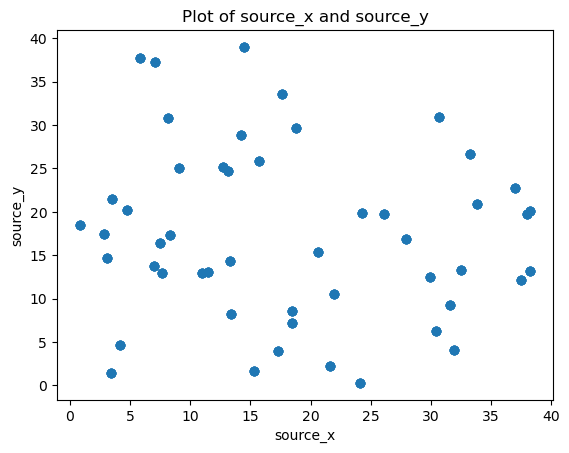

In [14]:

plt.scatter(data['source_x'], data['source_y'])
plt.xlabel('source_x')
plt.ylabel('source_y')
plt.title('Plot of source_x and source_y')
plt.show()

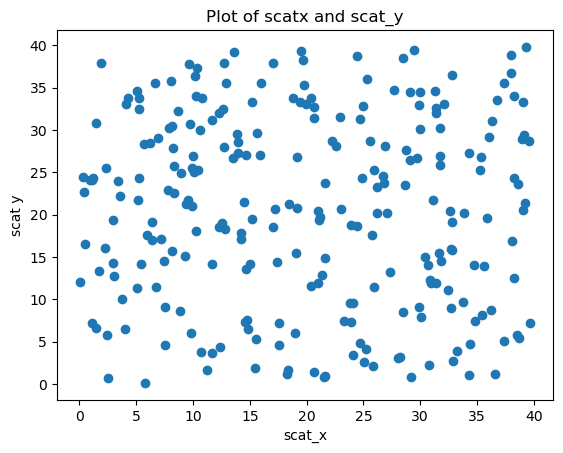

In [16]:

plt.scatter(data['scat_x'], data['scat_y'])
plt.xlabel('scat_x')
plt.ylabel('scat y')
plt.title('Plot of scatx and scat_y')
plt.show()

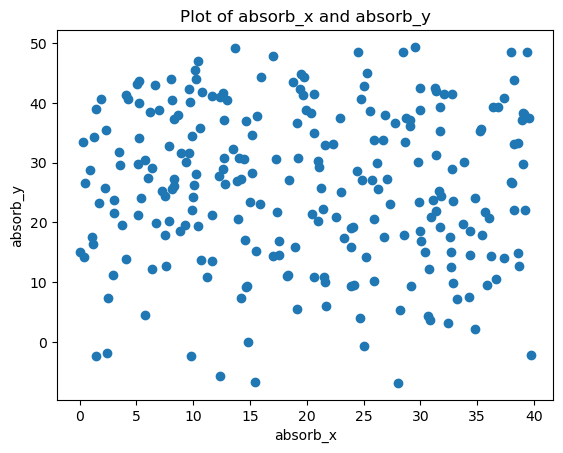

In [15]:

plt.scatter(data['absorb_x'], data['absorb_y'])
plt.xlabel('absorb_x')
plt.ylabel('absorb_y')
plt.title('Plot of absorb_x and absorb_y')
plt.show()

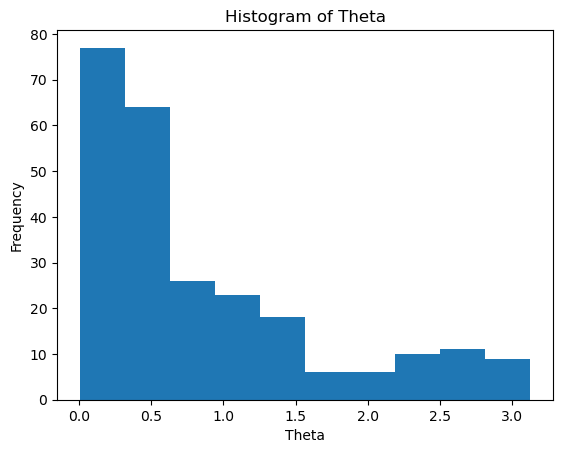

In [17]:

plt.hist(data['theta'], bins=10)
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.title('Histogram of Theta')
plt.show()

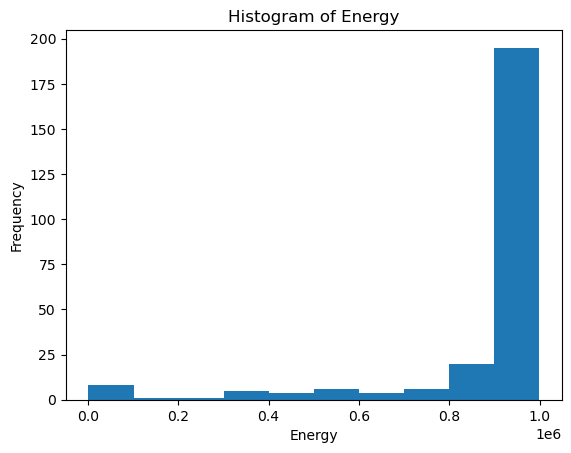

In [18]:

plt.hist(data['e_energy'], bins=10)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Energy')
plt.show()

In [66]:
labels = data[['source_x', 'source_y']]
features = data.drop(columns=['source_x', 'source_y', 'source_z'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
labels_scaled = scaler.fit_transform(labels)

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_scaled, test_size=0.2)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (200, 8)
y_train: (200, 2)

Testing set shapes:
X_test: (50, 8)
y_test: (50, 2)


In [80]:
X_train.shape[1]

8

In [78]:
y_test

array([[ 0.5212056 ,  0.26533122],
       [-1.25330545, -1.28729629],
       [ 1.36430824,  0.36934971],
       [-0.43890775, -0.91797892],
       [-0.44726828, -0.2945485 ],
       [ 1.75972972,  0.28771516],
       [-0.94616439, -0.44242935],
       [-1.11059589,  2.07930794],
       [ 0.00571104, -0.88134545],
       [ 0.03912344,  1.25891229],
       [ 1.75972972,  0.28771516],
       [-0.94616439, -0.44242935],
       [ 0.19881366, -0.18801985],
       [ 1.24629806, -0.40632331],
       [-0.9575099 , -0.084854  ],
       [-0.44726828, -0.2945485 ],
       [-0.65515036, -0.43546128],
       [-0.81935082,  0.79479386],
       [-0.88750537,  0.00334737],
       [-0.65515036, -0.43546128],
       [-0.94616439, -0.44242935],
       [-0.90502149,  1.38211866],
       [-0.23661062,  0.87780963],
       [ 1.24629806, -0.40632331],
       [ 1.08753723,  1.39140907],
       [ 0.0056982 , -1.02046121],
       [-1.3484322 , -0.26373821],
       [-0.5004821 ,  0.8063492 ],
       [ 1.73246722,

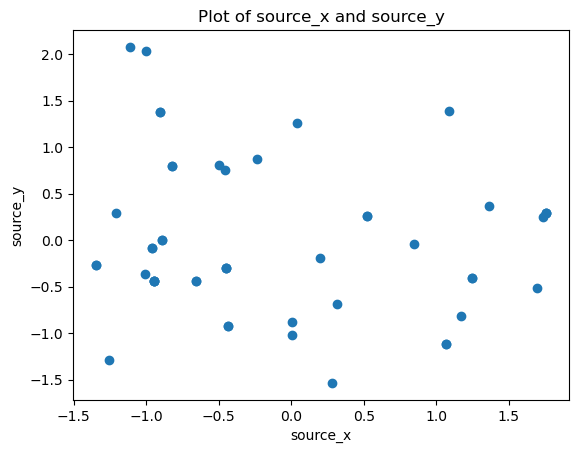

In [79]:

plt.scatter(y_test[:,0], y_test[:,1])
plt.xlabel('source_x')
plt.ylabel('source_y')
plt.title('Plot of source_x and source_y')
plt.show()

In [81]:
def create_model(optimizer='adam', neurons=64):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(2))
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [82]:

model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [64, 128, 256]
}

C:\Users\sruth\AppData\Local\Temp\ipykernel_13956\2273338710.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [83]:
# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [85]:
# Perform the grid search
grid_result = grid.fit(X_train, y_train)

In [91]:
# Extract and print all results
results = pd.DataFrame(grid_result.cv_results_)
print(results)

# Optionally, save the results to a CSV file
results.to_csv('./grid_search_results.csv', index=False)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.448555      0.037853         2.081334        0.470489   
1        6.857889      0.738220         1.542666        0.111254   
2        7.417897      0.287171         2.473329        0.417399   
3        7.245890      0.611000         1.848008        0.117751   
4        1.558659      0.595369         0.350665        0.140106   
5        3.130657      0.302711         0.589332        0.063020   
6        3.986666      0.051673         0.593340        0.007552   
7        4.506666      0.105595         0.502667        0.011470   
8        4.377331      0.035972         0.529337        0.089703   
9        5.117335      0.151802         1.010794        0.037257   
10       5.176003      0.040792         1.024338        0.057225   
11       7.061671      0.075210         0.494666        0.025368   
12       9.064339      0.496257         0.923999        0.219407   
13      10.018899      0.618682         0.811988

In [86]:
# Print the best parameters and best score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: -1.1084086497624714 using {'batch_size': 64, 'epochs': 50, 'neurons': 64, 'optimizer': 'adam'}


In [107]:

# Define and compile a simple the model
# model = tf.keras.Sequential([
#     layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(2)
# ])
# model.compile(optimizer='adam', loss='mse')


In [114]:
model = tf.keras.Sequential([
    layers.Reshape((8, 1), input_shape=(8,)),  
    layers.Conv1D(64, 1, activation='relu'),  
    layers.Flatten(),  \
    layers.Dense(64, activation='relu', ),  # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(2)  # Output layer with 2 units for the two targets
])
model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 8, 1)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 64)             128       
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                32832     
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dense_51 (Dense)            (None, 2)                 130       
                                                                 
Total params: 37,250
Trainable params: 37,250
Non-tra

In [115]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
print(f"Training time: {time.time() - start_time} seconds")

Epoch 1/50
3/3 [==============================] - 1s 162ms/step - loss: 1.0994 - val_loss: 0.8935
Epoch 2/50
3/3 [==============================] - 0s 54ms/step - loss: 1.0670 - val_loss: 0.8932
Epoch 3/50
3/3 [==============================] - 0s 54ms/step - loss: 1.0514 - val_loss: 0.8949
Epoch 4/50
3/3 [==============================] - 0s 52ms/step - loss: 1.0374 - val_loss: 0.8939
Epoch 5/50
3/3 [==============================] - 0s 54ms/step - loss: 1.0262 - val_loss: 0.8903
Epoch 6/50
3/3 [==============================] - 0s 56ms/step - loss: 1.0145 - val_loss: 0.8871
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 1.0039 - val_loss: 0.8837
Epoch 8/50
3/3 [==============================] - 0s 24ms/step - loss: 0.9922 - val_loss: 0.8797
Epoch 9/50
3/3 [==============================] - 0s 26ms/step - loss: 0.9817 - val_loss: 0.8832
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 0.9712 - val_loss: 0.8802
Epoch 11/50
3/3 [===========

In [116]:
start_time = time.time()
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

predictions = model.predict(X_test)
#print("Predictions:")
#print(predictions)

prediction_time = time.time() - start_time
print("Prediction Time: ", prediction_time)


2/2 [==============================] - 0s 4ms/step - loss: 1.2416
Test Loss: 1.2415568828582764
2/2 [==============================] - 0s 4ms/step
Prediction Time:  0.29998087882995605


Mean Squared Error on Test Set: 1.2415569373682283


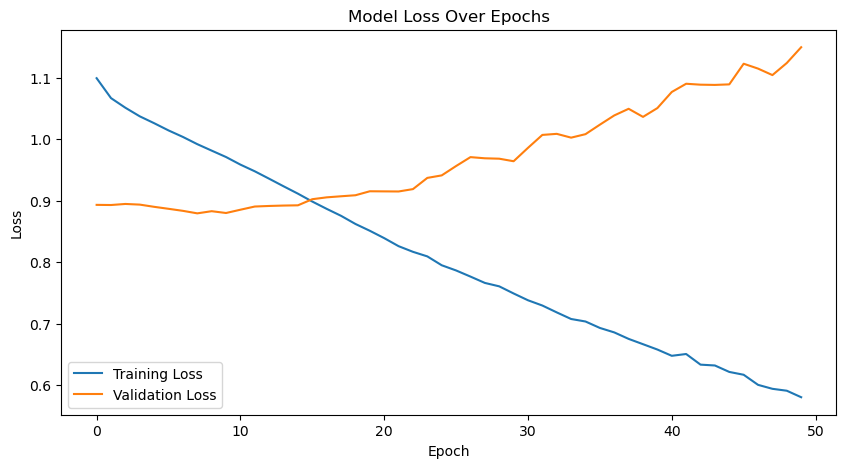

In [117]:

mse = np.mean((predictions - y_test)**2)
print("Mean Squared Error on Test Set:", mse)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


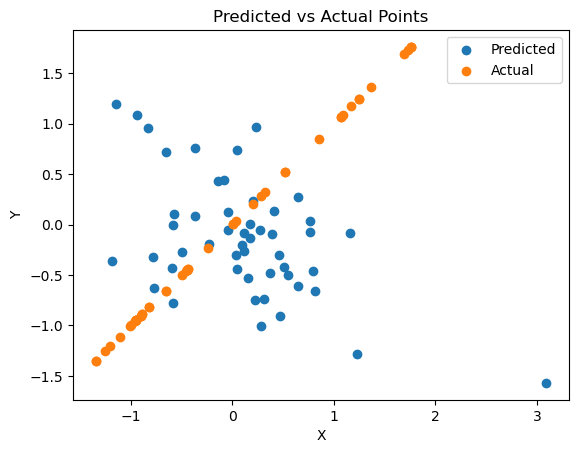

In [118]:

# Plot predicted points
plt.scatter(predictions[:, 0], predictions[:, 1], label='Predicted')

# Plot actual points from y_test
plt.scatter(y_test[:,0], y_test[:,0], label='Actual')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predicted vs Actual Points')

# Add legend
plt.legend()

# Show the plot
plt.show()